**IPL DATA ANALYSIS (2008 - 2025)**

# 📌 Introduction

**🎯 Objective of the Analysis**

The objective of this analysis is to perform an in-depth Exploratory Data Analysis (EDA) on Indian Premier League (IPL) data from 2008 to 2025. The goal is to uncover meaningful insights, patterns, and trends related to players, teams, venues, and match outcomes. This analysis will help understand how the IPL has evolved over the years and provide a data-driven perspective on team performances, player contributions, and tournament dynamics.

**📊 Data Sources Used**

**Primary Dataset:** IPL match, ball-by-ball, teams, players datasets (2008–2025).

**Match Data:** Information about matches such as season, teams, toss decisions, venues, umpires, and results.

**Ball-by-Ball Data:** Detailed delivery-level information including batsman runs, extras, wickets, bowler statistics, and dismissal types.

**Teams Data:** Information about teams.

**Players Data:** Information about players.

Updated IPL data scraped from ESPN Cricinfo / Kaggle / official IPL site.

# ❓ Key Questions to Explore

# Team Analysis

Which teams have been the most successful across seasons?

How does toss decision impact match outcomes?

Which venues favor batting vs. bowling sides?

# Player Performance

Who are the top run scorers and wicket-takers over the years?

Which batsmen excel in different match situations (powerplay, middle overs, death overs)?

Which bowlers dominate in pressure situations?

# Match Trends

How has the average first-innings score evolved across seasons?

Are there any scoring pattern differences before and after the introduction of new rules (e.g., strategic timeouts, impact player)?

What role does home advantage play in winning matches?


# Seasonal & Evolution Insights

How have team strategies evolved across different seasons?

Which players have been the most consistent throughout IPL history?

What new trends can be observed in IPL 2023–2025 compared to earlier years?

# 🔹 Description of Datasets

For IPL analysis, multiple datasets are typically used:

**Matches Dataset**

Contains match-level information such as season, venue, teams, toss result, match result, and winner.

Each row corresponds to a single match.

**Ball-by-Ball Dataset**

Contains detailed delivery-level data such as bowler, batsman, runs scored, extras, and wickets.

Each row corresponds to one ball bowled in IPL history.

**Teams Dataset**

Contains details about IPL franchises, team codes, and their participation in different seasons.

**Players Dataset**

Contains player details such as player ID, name, batting/bowling style, country, and role.

# 🔹 Data Dictionary (Important Columns Explained)

**Matches Dataset**

match_id → Unique match identifier

season_id → IPL season (year)

date → Match date

team1, team2 → Competing teams

toss_winner → Team that won the toss

toss_decision → Toss choice (bat/field)

venue → Ground name

city → City where match was played

winner → Match winner

win_by_runs → Victory margin (runs)

win_by_wickets → Victory margin (wickets)

player_of_match → Best performer of the match

**Ball-by-Ball Dataset**

match_id → Links to matches dataset

over → Over number

ball → Ball number within the over

batsman → Striker’s name

non_striker → Non-striker’s name

bowler → Bowler’s name

runs_batsman → Runs scored off the bat

extras → Extras conceded (wide, no-ball, bye, leg-bye)

total_runs → Total runs in that delivery

dismissal_kind → Type of wicket (bowled, caught, run-out, etc.)

player_dismissed → Player out on the ball (if any)

**Teams Dataset**

team_id → Unique team identifier

team_name → Full name of team

short_name → Abbreviation (e.g., MI, CSK)

**Players Dataset**

player_id → Unique player identifier

player_name → Name of the player

role → Role (Batsman, Bowler, All-rounder, Wicketkeeper)

batting_style → (Right-hand bat / Left-hand bat)

bowling_style → (Right-arm fast, Left-arm spin, etc.)

In [1]:
import pandas as pd

# Load all the datasets
ball_by_ball_df = pd.read_csv("E:/Project/IPL/ball_by_ball_data.csv")
matches_df = pd.read_csv("E:/Project/IPL/ipl_matches_data.csv")
players_df = pd.read_csv("E:/Project/IPL/players-data.csv")
teams_df = pd.read_csv("E:/Project/IPL/teams_data.csv")

# Display the first few rows of each dataset to understand their structure

print("ball_by_ball_data")
display(ball_by_ball_df.head())
print()
print("ipl_matches_data")
display(matches_df.head())
print()
print("players_data_updated")
display(players_df.head())
print()
print("teams_data")
display(teams_df.head())


ball_by_ball_data


,season_id,match_id,batter,bowler,non_striker,team_batting,team_bowling,over_number,ball_number,batter_runs,...,is_bye,is_penalty,wide_ball_runs,no_ball_runs,leg_bye_runs,bye_runs,penalty_runs,wicket_kind,is_super_over,innings
0,2008,335982,R Dravid,AB Dinda,W Jaffer,1,6,0,0,1,...,False,False,0,0,0,0,0,NaN,False,2
1,2008,335982,W Jaffer,AB Dinda,R Dravid,1,6,0,1,0,...,False,False,1,0,0,0,0,NaN,False,2
2,2008,335982,W Jaffer,AB Dinda,R Dravid,1,6,0,2,0,...,False,False,0,0,0,0,0,NaN,False,2
3,2008,335982,W Jaffer,AB Dinda,R Dravid,1,6,0,3,1,...,False,False,0,0,0,0,0,NaN,False,2
4,2008,335982,R Dravid,AB Dinda,W Jaffer,1,6,0,4,1,...,False,False,0,0,0,0,0,NaN,False,2



ipl_matches_data


,match_id,season_id,balls_per_over,city,match_date,event_name,match_number,gender,match_type,format,...,venue,toss_winner,team1,team2,toss_decision,match_winner,win_by_runs,win_by_wickets,player_of_match,result
0,335982,2008,6,Bangalore,18-04-2008,Indian Premier League,1.0,male,T20,T20,...,M Chinnaswamy Stadium,1,1,6,field,6,140.0,NaN,46.0,win
1,335983,2008,6,Chandigarh,19-04-2008,Indian Premier League,2.0,male,T20,T20,...,"Punjab Cricket Association Stadium, Mohali",7,10,7,bat,7,33.0,NaN,11943.0,win
2,335984,2008,6,Delhi,19-04-2008,Indian Premier League,3.0,male,T20,T20,...,Feroz Shah Kotla,8,9,8,bat,9,NaN,9.0,11982.0,win
3,335985,2008,6,Mumbai,20-04-2008,Indian Premier League,5.0,male,T20,T20,...,Wankhede Stadium,3,3,1,bat,1,NaN,5.0,11935.0,win
4,335986,2008,6,Kolkata,20-04-2008,Indian Premier League,4.0,male,T20,T20,...,Eden Gardens,13,6,13,bat,6,NaN,5.0,1191313.0,win



players_data_updated


,player_id,player_name,bat_style,bowl_style,field_pos,player_full_name
0,6730,Mohsin Khan,Left hand Bat,Left arm Medium fast,NaN,Mohsin Khan
1,22,Rashid Khan,Right hand Bat,Legbreak Googly,,Rashid Khan Arman
2,590,K Rabada,Left hand Bat,Right arm Fast,,Kagiso Rabada
3,1424,SN Khan,Right hand Bat,Legbreak,,Sarfaraz Naushad Khan
4,963,MN Samuels,Right hand Bat,Right arm Offbreak,,Marlon Nathaniel Samuels



teams_data


,team_id,team_name
0,1,Royal Challengers Bangaluru
1,2,Sunrisers Hyderabad
2,3,Mumbai Indians
3,4,Rising Pune Supergiants
4,5,Gujarat Lions


# 🔹 Data Cleaning & Preprocessing Steps

**Handling Missing Values**

Some matches may not have results (e.g., abandoned, no result) → Handle with NaN or mark as "NR".

Player and umpire names may be missing in early seasons → Fill or drop depending on analysis.

**Standardizing Team & Player Names**

Ensure consistent team names (e.g., "Delhi Daredevils" → "Delhi Capitals").

Fix spelling variations in player names (e.g., "Rohit Sharma " vs "Rohit Sharma").

**Date & Time Formatting**

Convert date column to datetime type for time-series analysis.

**Feature Engineering**

Add derived columns like season year, match margin type (runs/wickets), batting strike rate, bowling economy, etc.

**Encoding Categorical Data**

For ML models, convert categorical variables (teams, players, venues) into numerical form (Label Encoding / One-Hot Encoding).

**Removing Irrelevant Columns**

Drop umpire info, match id duplicates, or rarely used metadata if not required for analysis.

**Merging Datasets**

Join ball-by-ball and matches dataset using match_id for combined insights.

Link players and teams data for player performance by franchise.

In [ ]:
# Map team IDs to team names using team and teams_data
team_id_name_map = teams_df.set_index('team_id')['team_name'].to_dict()

# Replace team IDs in matches_df with team names
matches_df['team1'] = matches_df['team1'].map(team_id_name_map)
matches_df['team2'] = matches_df['team2'].map(team_id_name_map)
matches_df['match_winner'] = matches_df['match_winner'].map(team_id_name_map)
matches_df['toss_winner'] = matches_df['toss_winner'].map(team_id_name_map)

# Map team names in ball_by_ball_df using the alias mapping
ball_by_ball_df['team_batting'] = ball_by_ball_df['team_batting'].map(team_id_name_map)
ball_by_ball_df['team_bowling'] = ball_by_ball_df['team_bowling'].map(team_id_name_map)

# Drop rows with unmapped teams (if any)
ball_by_ball_df.dropna(subset=['team_batting', 'team_bowling'], inplace=True)
matches_df.dropna(subset=['team1', 'team2'], inplace=True)

# Ensure date is in datetime format for season-based analysis

matches_df['match_date'] = pd.to_datetime(matches_df['match_date'], dayfirst=True)

# Preview cleaned data
print("matches_df_cleaned")
display(matches_df.head())
print("\nball_by_ball_df_cleaned")
display(ball_by_ball_df.head())


matches_df_cleaned


,match_id,season_id,balls_per_over,city,match_date,event_name,match_number,gender,match_type,format,...,venue,toss_winner,team1,team2,toss_decision,match_winner,win_by_runs,win_by_wickets,player_of_match,result
0,335982,2008,6,Bangalore,2008-04-18,Indian Premier League,1.0,male,T20,T20,...,M Chinnaswamy Stadium,Royal Challengers Bangaluru,Royal Challengers Bangaluru,Kolkata Knight Riders,field,Kolkata Knight Riders,140.0,NaN,46.0,win
1,335983,2008,6,Chandigarh,2008-04-19,Indian Premier League,2.0,male,T20,T20,...,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Punjab Kings,Chennai Super Kings,bat,Chennai Super Kings,33.0,NaN,11943.0,win
2,335984,2008,6,Delhi,2008-04-19,Indian Premier League,3.0,male,T20,T20,...,Feroz Shah Kotla,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,Delhi Capitals,NaN,9.0,11982.0,win
3,335985,2008,6,Mumbai,2008-04-20,Indian Premier League,5.0,male,T20,T20,...,Wankhede Stadium,Mumbai Indians,Mumbai Indians,Royal Challengers Bangaluru,bat,Royal Challengers Bangaluru,NaN,5.0,11935.0,win
4,335986,2008,6,Kolkata,2008-04-20,Indian Premier League,4.0,male,T20,T20,...,Eden Gardens,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,Kolkata Knight Riders,NaN,5.0,1191313.0,win



ball_by_ball_df_cleaned


,season_id,match_id,batter,bowler,non_striker,team_batting,team_bowling,over_number,ball_number,batter_runs,...,is_bye,is_penalty,wide_ball_runs,no_ball_runs,leg_bye_runs,bye_runs,penalty_runs,wicket_kind,is_super_over,innings
0,2008,335982,R Dravid,AB Dinda,W Jaffer,Royal Challengers Bangaluru,Kolkata Knight Riders,0,0,1,...,False,False,0,0,0,0,0,NaN,False,2
1,2008,335982,W Jaffer,AB Dinda,R Dravid,Royal Challengers Bangaluru,Kolkata Knight Riders,0,1,0,...,False,False,1,0,0,0,0,NaN,False,2
2,2008,335982,W Jaffer,AB Dinda,R Dravid,Royal Challengers Bangaluru,Kolkata Knight Riders,0,2,0,...,False,False,0,0,0,0,0,NaN,False,2
3,2008,335982,W Jaffer,AB Dinda,R Dravid,Royal Challengers Bangaluru,Kolkata Knight Riders,0,3,1,...,False,False,0,0,0,0,0,NaN,False,2
4,2008,335982,R Dravid,AB Dinda,W Jaffer,Royal Challengers Bangaluru,Kolkata Knight Riders,0,4,1,...,False,False,0,0,0,0,0,NaN,False,2


#  📊 Tournament Overview

Matches played per season

Total runs scored per season

Runs per match trends across seasons

**What was the count of matches played in each season?**

In [ ]:
# Count of matches per season
matches_per_season = matches_df.groupby('season_id')['match_number'].nunique().reset_index()
matches_per_season.columns = ['Season', 'League Matches']
matches_per_season.sort_values('Season', inplace=True)

matches_per_season['Total Matches'] = matches_per_season['League Matches'] + 4
matches_per_season

,Season,League Matches,Total Matches
0,2008,55,59
1,2009,54,58
2,2010,56,60
3,2011,68,72
4,2012,64,68
5,2013,72,76
6,2014,56,60
7,2015,54,58
8,2016,56,60
9,2017,55,59


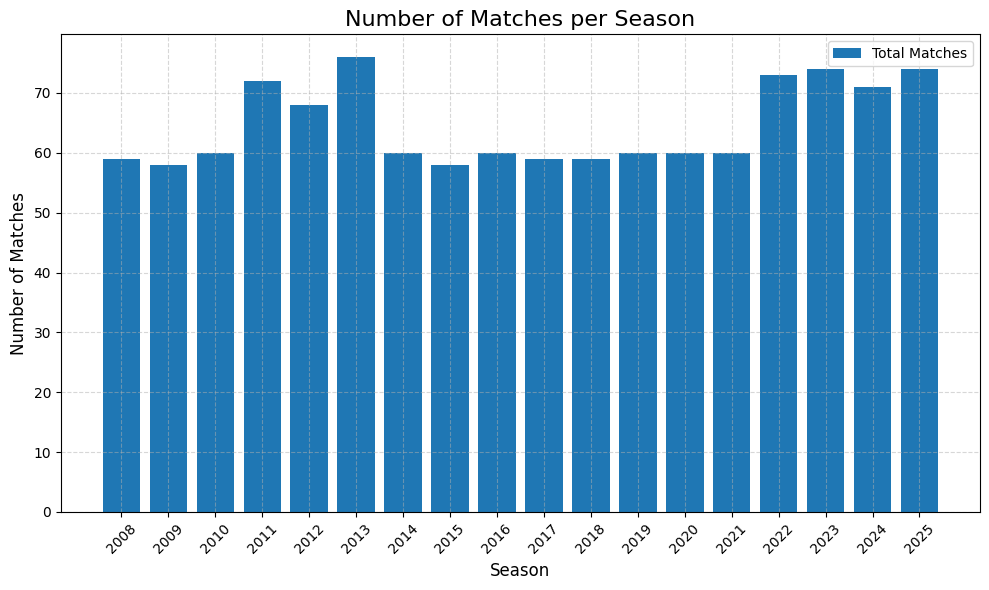

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create figure and axis
plt.figure(figsize=(10,6))

# Plot line for Total Matches
plt.bar(matches_per_season['Season'].astype(str), matches_per_season['Total Matches'], label='Total Matches')

# Title and labels
plt.title('Number of Matches per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid( linestyle='--', alpha=0.5)

# Show plot
plt.show()


**How many runs were scored in each season?**

In [ ]:
# Calculate total runs per delivery
ball_by_ball_df['total_runs'] = (
    ball_by_ball_df['batter_runs'] +
    ball_by_ball_df['wide_ball_runs'] +
    ball_by_ball_df['no_ball_runs'] +
    ball_by_ball_df['leg_bye_runs'] +
    ball_by_ball_df['bye_runs'] +
    ball_by_ball_df['penalty_runs']
)

# Get total runs per match
runs_per_match = ball_by_ball_df.groupby('match_id')['total_runs'].sum().reset_index()

# Merge with match data to get season info
runs_with_season = runs_per_match.merge(matches_df[['match_id', 'season_id']], on='match_id')

# Aggregate runs per season
runs_per_season = runs_with_season.groupby('season_id')['total_runs'].sum().reset_index()
runs_per_season = runs_per_season.sort_values('season_id')

display(runs_per_season)

,season_id,total_runs
0,2008,19211
1,2009,11558
2,2010,20877
3,2011,17968
4,2012,21062
5,2013,24560
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


C:\Users\stpar\AppData\Local\Temp\ipykernel_10312\4198723221.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


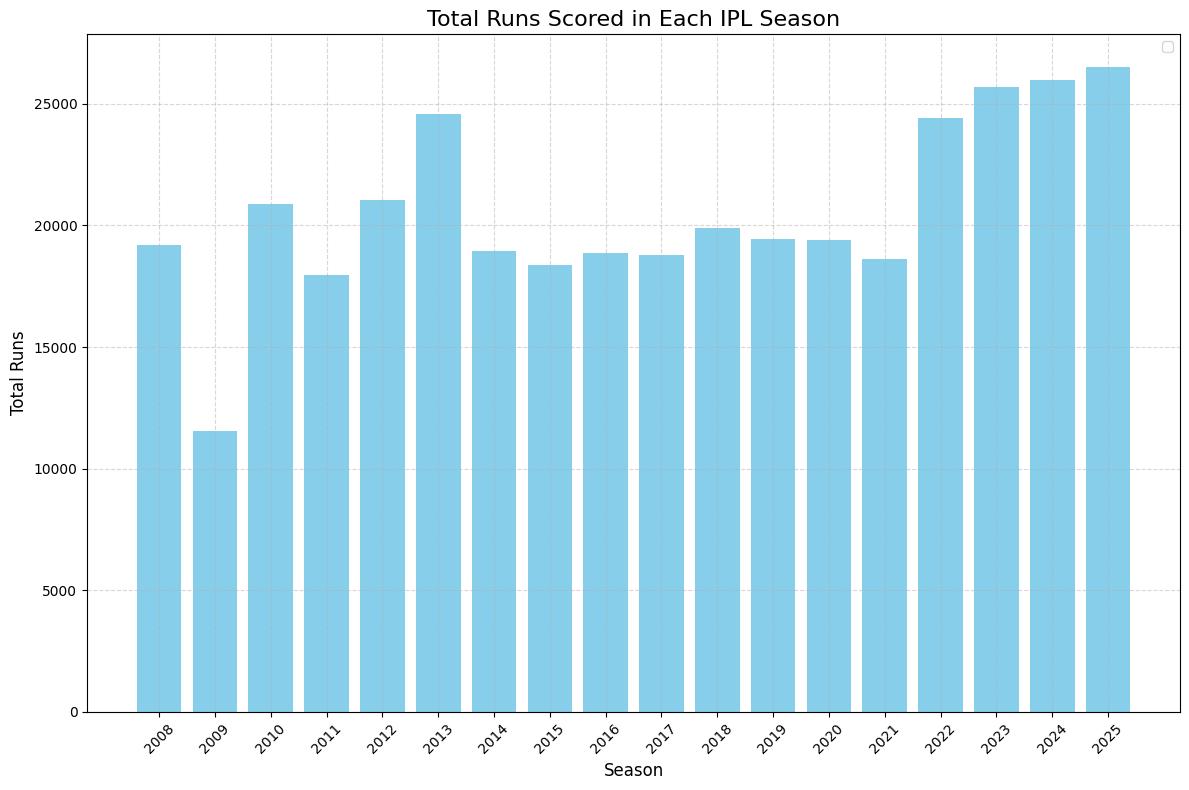

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.bar(runs_per_season['season_id'].astype(str), runs_per_season['total_runs'], color='skyblue')
# Create figure and axis
plt.title('Total Runs Scored in Each IPL Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid( linestyle='--', alpha=0.5)

# Show plot
plt.show()


**What were the runs scored per match in different seasons?**

In [ ]:
# Calculate total runs per delivery
ball_by_ball_df['total_runs'] = (
    ball_by_ball_df['batter_runs'] +
    ball_by_ball_df['wide_ball_runs'] +
    ball_by_ball_df['no_ball_runs'] +
    ball_by_ball_df['leg_bye_runs'] +
    ball_by_ball_df['bye_runs'] +
    ball_by_ball_df['penalty_runs']
)

# Get total runs per match
runs_per_match = ball_by_ball_df.groupby('match_id')['total_runs'].sum().reset_index()

# Merge with match data to get season info
match_with_season = matches_df[['match_id', 'season_id']]
runs_per_match_season = runs_per_match.merge(match_with_season, on='match_id')

# Reorder columns
runs_per_match_season = runs_per_match_season[['season_id', 'match_id', 'total_runs']]

# Sort for better readability
runs_per_match_season = runs_per_match_season.sort_values(['season_id', 'match_id'])

# Display or export
display(runs_per_match_season)

,season_id,match_id,total_runs
2,2008,335982,304
3,2008,335983,447
4,2008,335984,261
5,2008,335985,331
6,2008,335986,266
...,...,...,...
1129,2025,1473508,207
1130,2025,1473509,436
1131,2025,1473510,410
1132,2025,1473511,374


# 🎲 Toss Analysis

Teams with most toss wins (per season & overall)

Toss decision trends (bat vs field %)

Impact of toss on match results (toss win → match win %)

**Which team has won the most tosses in each season?**

In [ ]:
# Most toss win
import pandas as pd

# Load datasets
matches_df = pd.read_csv("ipl_matches_data.csv")
teams_df = pd.read_csv("teams_data.csv")

# Step 1: Ensure consistent types
matches_df['toss_winner'] = matches_df['toss_winner'].astype(str)
teams_df['team_id'] = teams_df['team_id'].astype(str)

# Step 2: Group by season and toss_winner to count toss wins
toss_wins_by_season = matches_df.groupby(['season_id', 'toss_winner']).size().reset_index(name='toss_wins')

# Step 3: Get team with max toss wins per season
max_toss_winners = toss_wins_by_season.loc[
    toss_wins_by_season.groupby('season_id')['toss_wins'].idxmax()
].reset_index(drop=True)

# Step 4: DEBUG - Check unmatched IDs
unmatched_ids = set(max_toss_winners['toss_winner']) - set(teams_df['team_id'])
if unmatched_ids:
    print("⚠️ Missing team IDs in teams_data.csv:", unmatched_ids)

# Step 5: Merge with team names
result = max_toss_winners.merge(
    teams_df[['team_id', 'team_name']],
    left_on='toss_winner',
    right_on='team_id',
    how='left'
)

# Step 6: Select final columns
final_result = result[['season_id', 'team_name', 'toss_wins']].sort_values('season_id').reset_index(drop=True)

# Step 7: Display final result
print("🏏 Team with Most Toss Wins in Each Season:")
display(final_result)

🏏 Team with Most Toss Wins in Each Season:


,season_id,team_name,toss_wins
0,2008,Rajasthan Royals,11
1,2009,Deccan Chargers,10
2,2010,Chennai Super Kings,10
3,2011,Punjab Kings,10
4,2012,Mumbai Indians,10
5,2013,Mumbai Indians,13
6,2014,Chennai Super Kings,10
7,2015,Royal Challengers Bangaluru,10
8,2016,Sunrisers Hyderabad,10
9,2017,Mumbai Indians,11


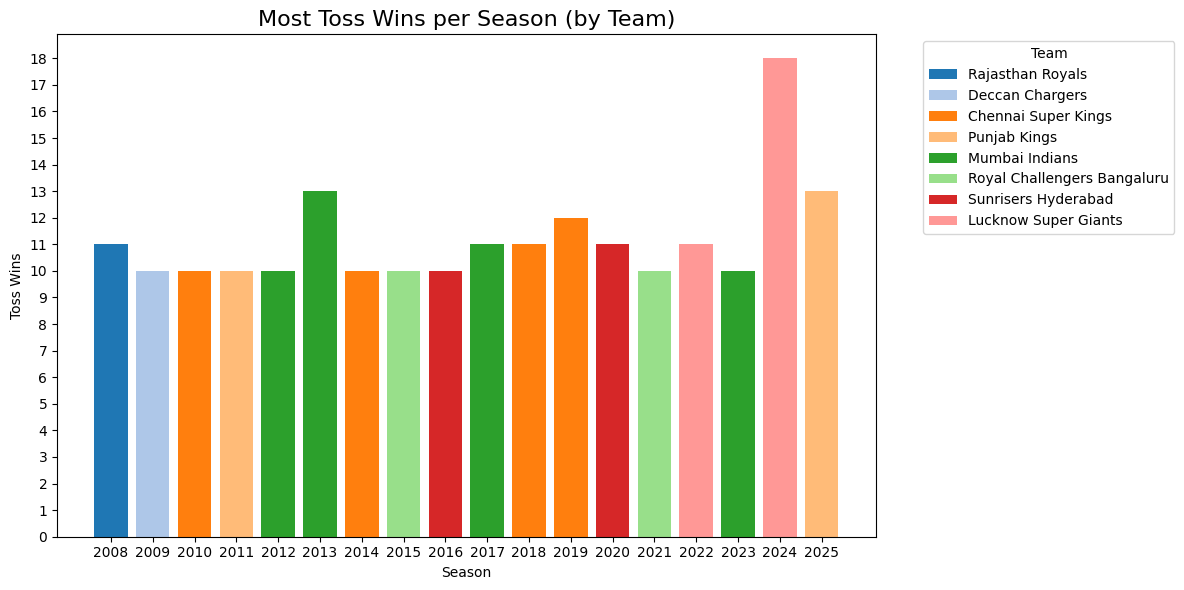

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create color palette for unique teams
teams = final_result['team_name'].unique()
palette = sns.color_palette("tab20", len(teams))  # distinct colors
team_color_map = dict(zip(teams, palette))

plt.figure(figsize=(12, 6))

# Plot each team's bar with its color
for i, row in final_result.iterrows():
    plt.bar(
        row['season_id'],
        row['toss_wins'],
        color=team_color_map[row['team_name']],
        label=row['team_name'] if row['team_name'] not in plt.gca().get_legend_handles_labels()[1] else ""
    )

plt.title('Most Toss Wins per Season (by Team)', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Toss Wins')
plt.xticks(sorted(final_result['season_id'].unique()))  # only integer seasons
plt.yticks(np.arange(0, final_result['toss_wins'].max() + 1, 1))  # integer steps

# Add legend to identify teams
plt.legend(title="Team", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


**What does the team decide after winning the toss?**

In [ ]:
# Calculate Overall Toss Decision Percentages
overall_toss_decision_counts = matches_df['toss_decision'].value_counts()
overall_toss_decision_percent = (overall_toss_decision_counts / overall_toss_decision_counts.sum()) * 100

overall_toss_decision_df = pd.DataFrame({
    'season_id': ['Overall'] * len(overall_toss_decision_percent),
    'decision': overall_toss_decision_percent.index,
    'percentage': overall_toss_decision_percent.values.round(2)
})

# Calculate Toss Decision Percentages for Each Season
season_wise_toss_decision = matches_df.groupby(['season_id', 'toss_decision']).size().reset_index(name='count')
season_total = matches_df.groupby('season_id').size().reset_index(name='total')

season_wise_toss_decision = season_wise_toss_decision.merge(season_total, on='season_id')
season_wise_toss_decision['percentage'] = (season_wise_toss_decision['count'] / season_wise_toss_decision['total']) * 100
season_wise_toss_decision = season_wise_toss_decision[['season_id', 'toss_decision', 'percentage']]
season_wise_toss_decision.rename(columns={'toss_decision': 'decision'}, inplace=True)

# Combine Overall and Season-wise Percentages
final_toss_decision_df = pd.concat([overall_toss_decision_df, season_wise_toss_decision], ignore_index=True)

# Pivot to Show 'Bat%' and 'Field%' as Columns
pivot_df = final_toss_decision_df.pivot(index='season_id', columns='decision', values='percentage').reset_index()
pivot_df.columns.name = None
pivot_df.rename(columns={'bat': 'Bat%', 'field': 'Field%'}, inplace=True)

# Fill missing values with 0 (in case a season has only one type of decision)
pivot_df.fillna(0, inplace=True)

# Optional: Round the values
pivot_df['Bat%'] = pivot_df['Bat%'].round(2)
pivot_df['Field%'] = pivot_df['Field%'].round(2)

# Show the result
display(pivot_df)

,season_id,Bat%,Field%
0,2008,44.83,55.17
1,2009,61.40,38.60
2,2010,65.00,35.00
3,2011,34.25,65.75
4,2012,48.53,51.47
5,2013,59.76,40.24
6,2014,31.67,68.33
7,2015,42.37,57.63
8,2016,18.33,81.67
9,2017,18.64,81.36


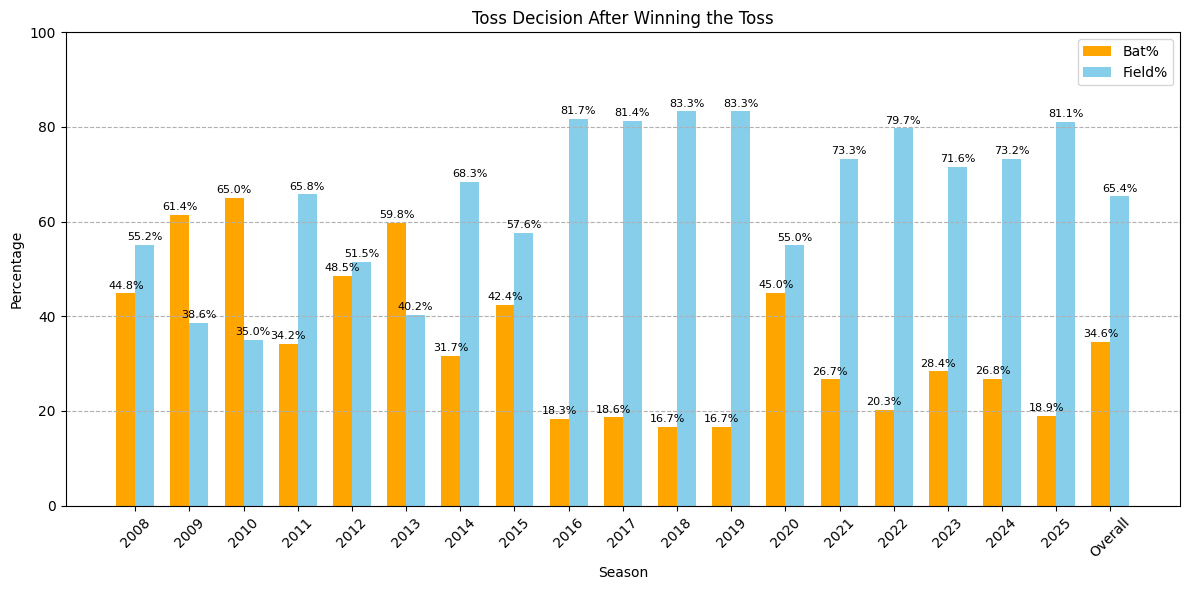

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your pivot_df
seasons = pivot_df['season_id']
bat_percent = pivot_df['Bat%']
field_percent = pivot_df['Field%']

# Set bar positions
x = np.arange(len(seasons))
width = 0.35

plt.figure(figsize=(12, 6))

# Bars for Bat% and Field%
plt.bar(x - width/2, bat_percent, width, label='Bat%', color='orange')
plt.bar(x + width/2, field_percent, width, label='Field%', color='skyblue')

# Labels and title
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.grid(axis ='y',linestyle='--')
plt.title('Toss Decision After Winning the Toss')
plt.xticks(x, seasons, rotation=45)
plt.yticks(np.arange(0, 101, 20))  # 0% to 100%, step 10
plt.legend()

# Display values on bars
for i, v in enumerate(bat_percent):
    plt.text(i - width/2, v + 1, f"{v:.1f}%", ha='center', fontsize=8)
for i, v in enumerate(field_percent):
    plt.text(i + width/2, v + 1, f"{v:.1f}%", ha='center', fontsize=8)

plt.tight_layout()
plt.show()


**Does winning the toss implies winning the game?**

In [ ]:
# Toss win match win
import pandas as pd
import matplotlib.pyplot as plt

# Load data
matches_df = pd.read_csv("E:/Project/IPL/ipl_matches_data.csv")

# Drop rows where either match_winner or toss_winner is missing
matches_df = matches_df.dropna(subset=['match_winner', 'toss_winner'])

# Ensure values are strings before applying string operations
matches_df['match_winner'] = matches_df['match_winner'].astype(str).str.strip().str.lower()
matches_df['toss_winner'] = matches_df['toss_winner'].astype(str).str.strip().str.lower()

# # Normalize team names (remove extra spaces & convert to lowercase)
# matches_df['match_winner'] = matches_df['match_winner'].str.strip().str.lower()
# matches_df['toss_winner'] = matches_df['toss_winner'].str.strip().str.lower()

# Create column to check if toss winner also won the match
matches_df['toss_win_match_win'] = matches_df['toss_winner'] == matches_df['match_winner']

# --- Overall Analysis ---
total_matches = len(matches_df)
toss_and_match_wins = matches_df['toss_win_match_win'].sum()
win_percentage = round((toss_and_match_wins / total_matches) * 100, 2)

print(f"\n✅ Toss winner also won the match in {toss_and_match_wins} out of {total_matches} matches.")
print(f"📊 Overall Win Percentage: {win_percentage}%")

# --- Season-wise Analysis ---
# Normalize season column name if needed
if 'season_id' not in matches_df.columns:
    matches_df.rename(columns={'season': 'season_id'}, inplace=True)

# Group by season
season_wise = matches_df.groupby('season_id')['toss_win_match_win'].agg(
    toss_win_and_match_win='sum',
    total_matches='count'
).reset_index()

season_wise['percentage'] = round(
    (season_wise['toss_win_and_match_win'] / season_wise['total_matches']) * 100, 2
)

# Display
print("\n📅 Season-wise Toss Impact:")
display(season_wise.sort_values('season_id'))


✅ Toss winner also won the match in 605 out of 1169 matches.
📊 Overall Win Percentage: 51.75%

📅 Season-wise Toss Impact:


,season_id,toss_win_and_match_win,total_matches,percentage
0,2008,28,58,48.28
1,2009,33,57,57.89
2,2010,31,60,51.67
3,2011,38,73,52.05
4,2012,29,68,42.65
5,2013,40,82,48.78
6,2014,30,60,50.00
7,2015,29,59,49.15
8,2016,34,60,56.67
9,2017,34,59,57.63


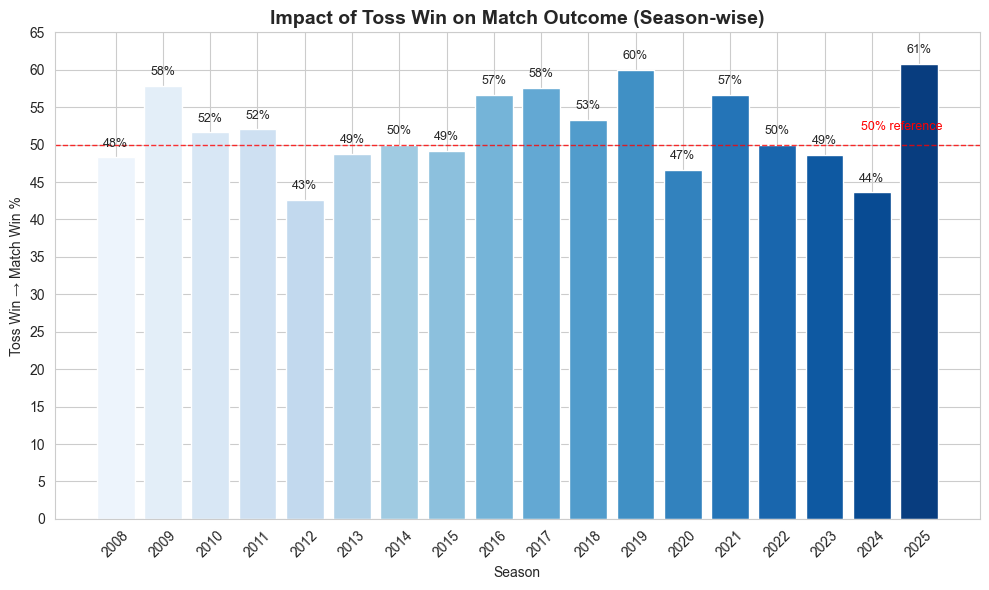

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Sort seasons and prepare labels
season_wise = season_wise.sort_values('season_id')
x_labels = season_wise['season_id'].astype(str)

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Blues", len(season_wise))
bars = plt.bar(x_labels, season_wise['percentage'], color=colors)

# Labels & title
plt.xlabel('Season')
plt.ylabel('Toss Win → Match Win %')
plt.title('Impact of Toss Win on Match Outcome (Season-wise)', fontsize=14, fontweight='bold')

# Integer y-axis ticks
ymax = int(np.ceil(season_wise['percentage'].max() / 5.0)) * 5
plt.yticks(np.arange(0, ymax + 5, 5))

# 50% reference line
plt.axhline(50, color='red', linestyle='--', linewidth=1, alpha=0.8)
plt.text(len(x_labels) - 0.5, 52, '50% reference', color='red', fontsize=9, ha='right')

# Values on bars
for bar in bars:
    h = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, h + 1, f"{int(round(h))}%", 
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 🏟️ Match Outcome Analysis

Chasing vs defending wins (per season & overall)

Win % comparison: batting first vs chasing


**How many times chasing team has won the match?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load match data
matches_df = pd.read_csv("ipl_matches_data.csv")

# Drop incomplete data
matches_df = matches_df.dropna(subset=['match_winner', 'toss_decision', 'team1', 'team2', 'toss_winner'])

# Normalize team names and toss decision
for col in ['match_winner', 'team1', 'team2', 'toss_winner']:
    matches_df[col] = matches_df[col].astype(str).str.strip().str.lower()

matches_df['toss_decision'] = matches_df['toss_decision'].astype(str).str.strip().str.lower()

# Determine first and second batting teams
def get_batting_order(row):
    if row['toss_decision'] == 'bat':
        first_batting = row['toss_winner']
        second_batting = row['team2'] if row['toss_winner'] == row['team1'] else row['team1']
    else:  # toss_winner fields, so they bat second
        second_batting = row['toss_winner']
        first_batting = row['team2'] if row['toss_winner'] == row['team1'] else row['team1']
    return pd.Series([first_batting, second_batting])

matches_df[['first_batting', 'second_batting']] = matches_df.apply(get_batting_order, axis=1)

# Check if match winner is the second batting team (chasing)
matches_df['chasing_win'] = matches_df['match_winner'] == matches_df['second_batting']

# 🔹 Overall chasing win statistics
total_chasing_wins = matches_df['chasing_win'].sum()
total_valid_matches = len(matches_df)
chasing_win_pct = (total_chasing_wins / total_valid_matches) * 100

print(f"🔸 Overall Chasing Wins: {total_chasing_wins} out of {total_valid_matches} matches ({chasing_win_pct:.2f}%)")

# 🔹 Season-wise chasing wins
# Ensure season_id exists
if 'season_id' not in matches_df.columns and 'season' in matches_df.columns:
    matches_df.rename(columns={'season': 'season_id'}, inplace=True)

season_wise = matches_df.groupby('season_id')['chasing_win'].agg(
    chasing_wins='sum',
    total_matches='count'
).reset_index()

season_wise['chasing_win_pct'] = (season_wise['chasing_wins'] / season_wise['total_matches']) * 100
season_wise['chasing_win_pct'] = season_wise['chasing_win_pct'].round(2)

print("\n🔸 Season-wise Chasing Wins:")
display(season_wise)

🔸 Overall Chasing Wins: 643 out of 1169 matches (55.00%)

🔸 Season-wise Chasing Wins:


,season_id,chasing_wins,total_matches,chasing_win_pct
0,2008,36,58,62.07
1,2009,30,57,52.63
2,2010,28,60,46.67
3,2011,41,73,56.16
4,2012,36,68,52.94
5,2013,41,82,50.00
6,2014,37,60,61.67
7,2015,26,59,44.07
8,2016,41,60,68.33
9,2017,33,59,55.93


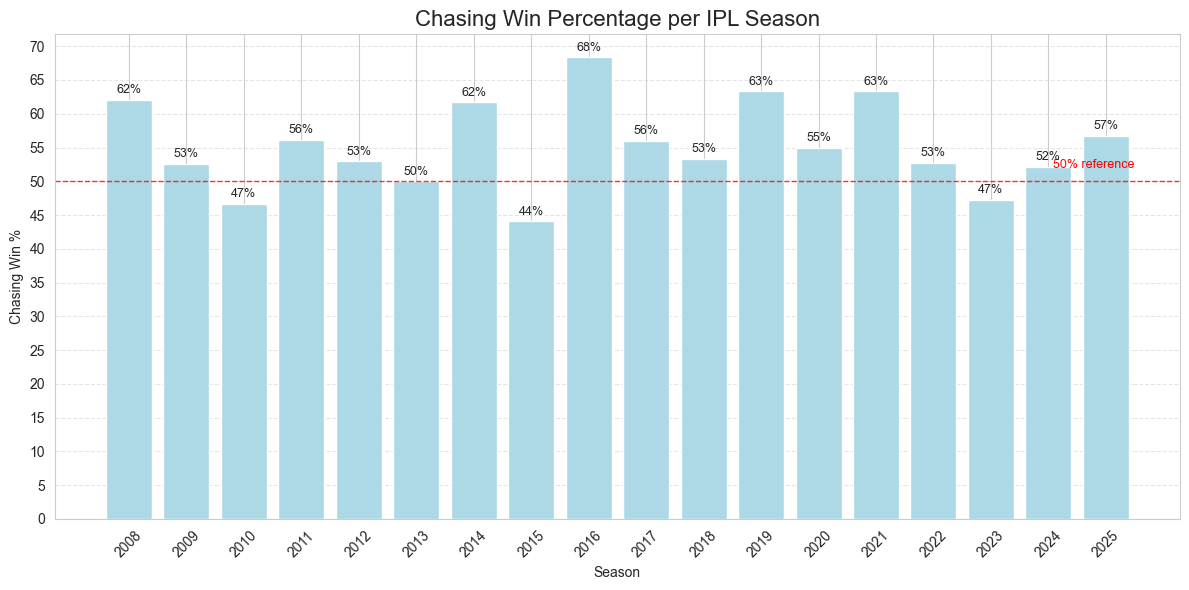

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 📊 Visualization - Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.bar(
    season_wise['season_id'].astype(str),
    season_wise['chasing_win_pct'],
    color='lightblue'
)

# Title & labels
plt.title('Chasing Win Percentage per IPL Season', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Chasing Win %')

# Integer y-axis ticks
ymax = int(np.ceil(season_wise['chasing_win_pct'].max() / 5.0)) * 5
plt.yticks(np.arange(0, ymax + 5, 5))

# 50% reference line
plt.axhline(50, color='red', linestyle='--', linewidth=1, alpha=0.8)
plt.text(len(season_wise) - 0.5, 52, '50% reference', color='red', fontsize=9, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{int(round(height))}%", 
             ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**How many times defending team has won the match?**

In [ ]:
import pandas as pd

# Drop rows with missing required fields
matches_df = matches_df.dropna(subset=['match_winner', 'toss_decision', 'team1', 'team2', 'toss_winner'])

# Normalize team names and toss decision
for col in ['match_winner', 'team1', 'team2', 'toss_winner']:
    matches_df[col] = matches_df[col].str.strip().str.lower()

matches_df['toss_decision'] = matches_df['toss_decision'].str.strip().str.lower()

# Determine first and second batting teams
def get_batting_order(row):
    if row['toss_decision'] == 'bat':
        first_batting = row['toss_winner']
        second_batting = row['team2'] if row['toss_winner'] == row['team1'] else row['team1']
    else:  # Toss winner chose to field, so they bat second
        second_batting = row['toss_winner']
        first_batting = row['team2'] if row['toss_winner'] == row['team1'] else row['team1']
    return pd.Series([first_batting, second_batting])

matches_df[['first_batting', 'second_batting']] = matches_df.apply(get_batting_order, axis=1)

# Check if defending team (1st batting) won
matches_df['defending_win'] = matches_df['match_winner'] == matches_df['first_batting']

# 🔹 Overall defending wins
total_defending_wins = matches_df['defending_win'].sum()
total_valid_matches = len(matches_df)
defending_win_pct = (total_defending_wins / total_valid_matches) * 100

print(f"🔸 Overall Defending Wins: {total_defending_wins} out of {total_valid_matches} matches ({defending_win_pct:.2f}%)")

# 🔹 Season-wise defending wins
if 'season_id' not in matches_df.columns:
    matches_df.rename(columns={'season': 'season_id'}, inplace=True)

season_wise = matches_df.groupby('season_id')['defending_win'].agg(
    defending_wins='sum',
    total_matches='count'
).reset_index()

season_wise['defending_win_pct'] = (season_wise['defending_wins'] / season_wise['total_matches']) * 100
season_wise['defending_win_pct'] = season_wise['defending_win_pct'].round(2)

print("\n🔸 Season-wise Defending Wins:")
display(season_wise)

🔸 Overall Defending Wins: 532 out of 1169 matches (45.51%)

🔸 Season-wise Defending Wins:


,season_id,defending_wins,total_matches,defending_win_pct
0,2008,22,58,37.93
1,2009,27,57,47.37
2,2010,32,60,53.33
3,2011,32,73,43.84
4,2012,32,68,47.06
5,2013,41,82,50.00
6,2014,23,60,38.33
7,2015,33,59,55.93
8,2016,19,60,31.67
9,2017,26,59,44.07


C:\Users\stpar\AppData\Local\Temp\ipykernel_10312\2142188824.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


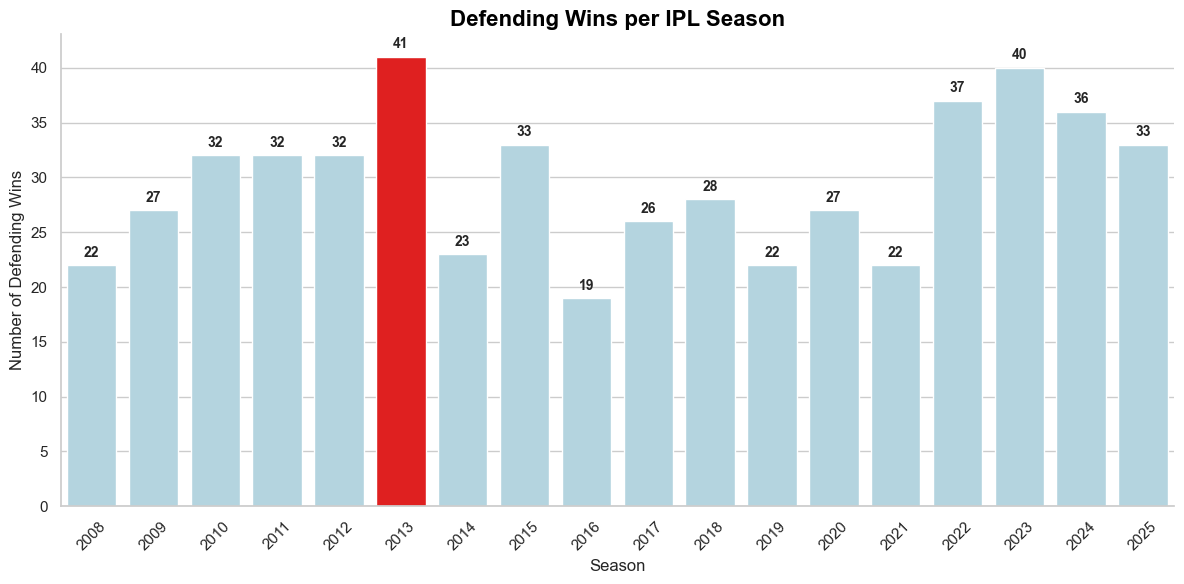

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for cleaner visuals
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Highlight the season with max defending wins
max_wins = season_wise['defending_wins'].max()
colors = ["lightblue" if val < max_wins else "red" for val in season_wise['defending_wins']]

# Create barplot
sns.barplot(
    data=season_wise,
    x='season_id',
    y='defending_wins',
    palette=colors
)

# Add value labels on top of each bar
for i, val in enumerate(season_wise['defending_wins']):
    plt.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Defending Wins per IPL Season', fontsize=16, fontweight='bold', color='black')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Defending Wins', fontsize=12)
plt.xticks(rotation=45)

# Remove top/right spines for cleaner look
sns.despine()

plt.tight_layout()
plt.show()

# 🏆 Team Performance

Matches played by each team

Win percentage of teams

Venue-wise win trends (lucky venues for teams)

Stadiums hosting the most matches


**Which team has played most matches across each season**

In [18]:
# Played most matches
import pandas as pd

# Load data
matches_df = pd.read_csv("E:/Project/IPL/ipl_matches_data.csv")
teams_df = pd.read_csv("E:/Project/IPL/teams_data.csv")

# Ensure correct column names in teams_df
# Assuming teams_df has: team_id, team_name
# If not, adjust accordingly
team_id_col = 'team_id'  # Change if different in your CSV

# Combine team1 and team2 appearances
all_teams = pd.concat([matches_df['team1'], matches_df['team2']], ignore_index=True)

# Count matches played per team_id
match_counts = (
    all_teams.value_counts()
    .rename_axis('team_id')
    .reset_index(name='matches_played')
)

# Merge with team names
team_matches = (
    match_counts
    .merge(teams_df, on=team_id_col, how='left')
    [['team_name', 'matches_played']]
    .sort_values(by='matches_played', ascending=False)
    .reset_index(drop=True)
)

# Display result
display(team_matches)

,team_name,matches_played
0,Mumbai Indians,277
1,Royal Challengers Bangaluru,270
2,Delhi Capitals,267
3,Punjab Kings,264
4,Kolkata Knight Riders,264
5,Chennai Super Kings,252
6,Rajasthan Royals,199
7,Sunrisers Hyderabad,196
8,Lucknow Super Giants,94
9,Deccan Chargers,75


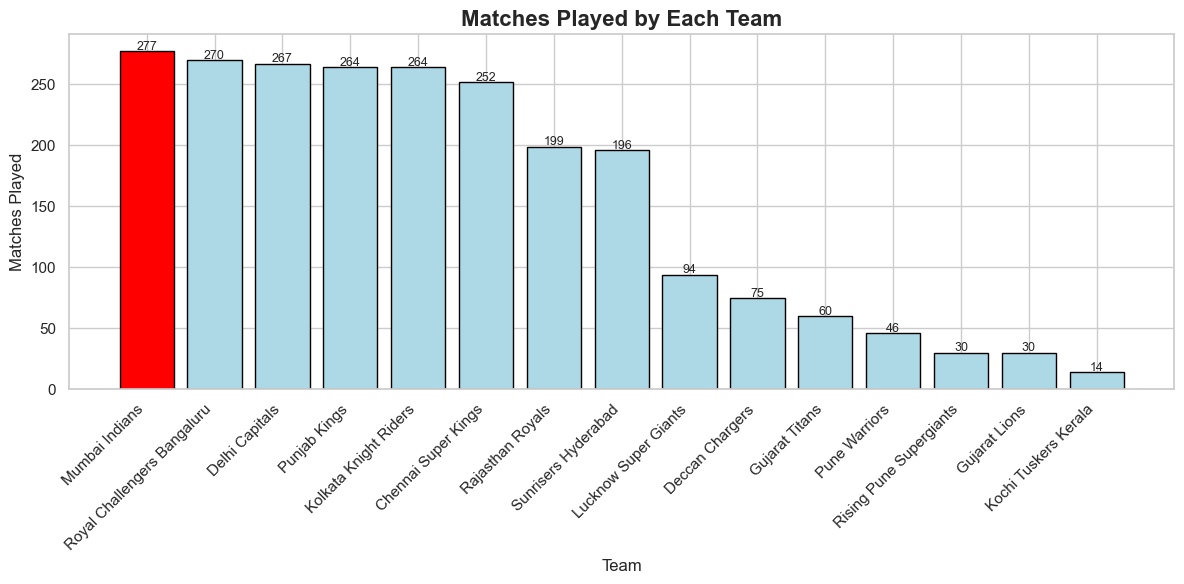

In [ ]:
import matplotlib.pyplot as plt

# Find the max matches played for coloring
max_team_matches = team_matches['matches_played'].max()

# Define colors: highlight the team with max matches in red, others in light blue
colors = ["lightblue" if val < max_team_matches else "red" for val in team_matches['matches_played']]

# Bar chart for matches played
plt.figure(figsize=(12, 6))
plt.bar(team_matches['team_name'], team_matches['matches_played'], color=colors, edgecolor='black')

# Chart details
plt.title('Matches Played by Each Team', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=12)
plt.ylabel('Matches Played', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Value labels on bars
for index, value in enumerate(team_matches['matches_played']):
    plt.text(index, value + 1, str(value), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

**Which team has the highest winning percentage?**

In [ ]:
# Ensure team_id and winner_team_id are of the same type
matches_df['match_winner'] = matches_df['match_winner'].astype(str)
matches_df['team1'] = matches_df['team1'].astype(str)
matches_df['team2'] = matches_df['team2'].astype(str)
teams_df['team_id'] = teams_df['team_id'].astype(str)

# Count total matches played per team
team1_matches = matches_df['team1'].value_counts()
team2_matches = matches_df['team2'].value_counts()
total_matches = (team1_matches + team2_matches).reset_index()
total_matches.columns = ['team_id', 'matches_played']

# Count matches won per team
wins = matches_df['match_winner'].value_counts().reset_index()
wins.columns = ['team_id', 'wins']

# Merge wins and matches
team_stats = pd.merge(total_matches, wins, on='team_id', how='left')
team_stats['wins'] = team_stats['wins'].fillna(0).astype(int)

# Calculate win percentage
team_stats['win_percent'] = (team_stats['wins'] / team_stats['matches_played'] * 100).round(2)

# Merge with team names
final_stats = pd.merge(team_stats, teams_df[['team_id', 'team_name']], on='team_id', how='left')

# Reorder and sort
final_stats = final_stats[['team_name', 'matches_played', 'wins', 'win_percent']]
final_stats = final_stats.sort_values(by='wins', ascending=False).reset_index(drop=True)

# Display
display(final_stats)


,team_name,matches_played,wins,win_percent
0,Mumbai Indians,277,153,55.23
1,Chennai Super Kings,252,143,56.75
2,Kolkata Knight Riders,264,136,51.52
3,Royal Challengers Bangaluru,270,133,49.26
4,Punjab Kings,264,123,46.59
5,Delhi Capitals,267,122,45.69
6,Rajasthan Royals,199,98,49.25
7,Sunrisers Hyderabad,196,97,49.49
8,Lucknow Super Giants,94,51,54.26
9,Gujarat Titans,60,37,61.67


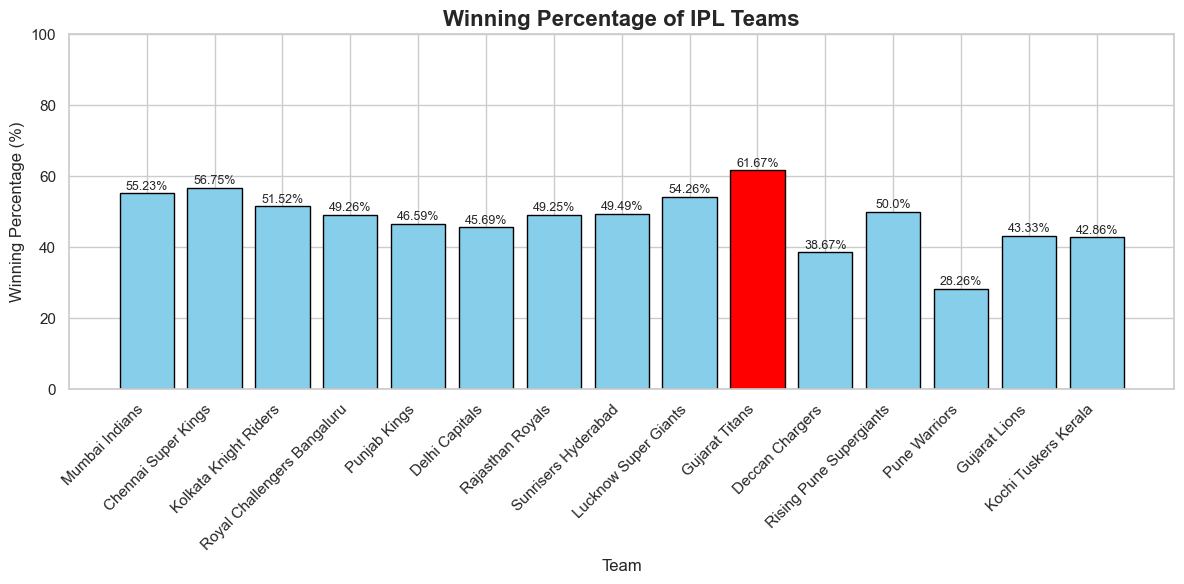

In [21]:
import matplotlib.pyplot as plt

# Find the max winning percentage
max_win_percent = final_stats['win_percent'].max()

# Define colors: highlight the top team in red, others in sky blue
colors = ["skyblue" if val < max_win_percent else "red" for val in final_stats['win_percent']]

# Bar chart for winning percentage
plt.figure(figsize=(12, 6))
plt.bar(final_stats['team_name'], final_stats['win_percent'], color=colors, edgecolor='black')

# Chart details
plt.title('Winning Percentage of IPL Teams', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=12)
plt.ylabel('Winning Percentage (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Since percentage max is 100

# Add value labels on top of bars
for index, value in enumerate(final_stats['win_percent']):
    plt.text(index, value + 1, f'{value}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()



**Is there any lucky venue for a particular team?**

In [ ]:
import pandas as pd

# Ensure consistent data types for merging
teams_df['team_id'] = teams_df['team_id'].astype(str)
matches_df['match_winner'] = matches_df['match_winner'].astype(str)

# Count wins per team per venue
wins_by_venue = matches_df.groupby(['match_winner', 'venue']).size().reset_index(name='wins')

# Total matches played by each team at each venue
matches_by_team_venue = matches_df[
    (matches_df['team1'].notna()) & (matches_df['team2'].notna())
]

# Convert team1 and team2 to str for safe comparisons
matches_by_team_venue['team1'] = matches_by_team_venue['team1'].astype(str)
matches_by_team_venue['team2'] = matches_by_team_venue['team2'].astype(str)

# Melt team1 and team2 to get all matches per team at each venue
team_venue_matches = pd.melt(
    matches_by_team_venue,
    id_vars=['venue'],
    value_vars=['team1', 'team2'],
    var_name='team_type',
    value_name='team_id'
)

# Count total matches played by each team at each venue
total_matches = team_venue_matches.groupby(['team_id', 'venue']).size().reset_index(name='total_matches')

# Merge total matches with wins
wins_with_total = pd.merge(wins_by_venue, total_matches, left_on=['match_winner', 'venue'], right_on=['team_id', 'venue'], how='left')

# Compute win percentage
wins_with_total['win_percent'] = (wins_with_total['wins'] / wins_with_total['total_matches']) * 100

# Get the venue with the highest win count for each team
idx = wins_with_total.groupby('match_winner')['wins'].idxmax()
lucky_venues = wins_with_total.loc[idx].reset_index(drop=True)

# Merge with team names
lucky_venues = pd.merge(lucky_venues, teams_df[['team_id', 'team_name']], left_on='match_winner', right_on='team_id', how='left')

# Finalize output columns
lucky_venues = lucky_venues[['team_name', 'venue', 'wins', 'total_matches', 'win_percent']]
lucky_venues['win_percent'] = lucky_venues['win_percent'].round(2)
lucky_venues = lucky_venues.sort_values(by='wins', ascending=False).reset_index(drop=True)

# Display in markdown format
display(lucky_venues)

,team_name,venue,wins,total_matches,win_percent
0,Kolkata Knight Riders,Eden Gardens,45,74,60.81
1,Mumbai Indians,Wankhede Stadium,41,67,61.19
2,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",33,47,70.21
3,Rajasthan Royals,Sawai Mansingh Stadium,32,47,68.09
4,Royal Challengers Bangaluru,M Chinnaswamy Stadium,28,61,45.90
5,Delhi Capitals,Feroz Shah Kotla,23,56,41.07
6,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",19,30,63.33
7,Punjab Kings,"Punjab Cricket Association Stadium, Mohali",18,35,51.43
8,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",13,23,56.52
9,Lucknow Super Giants,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,10,22,45.45


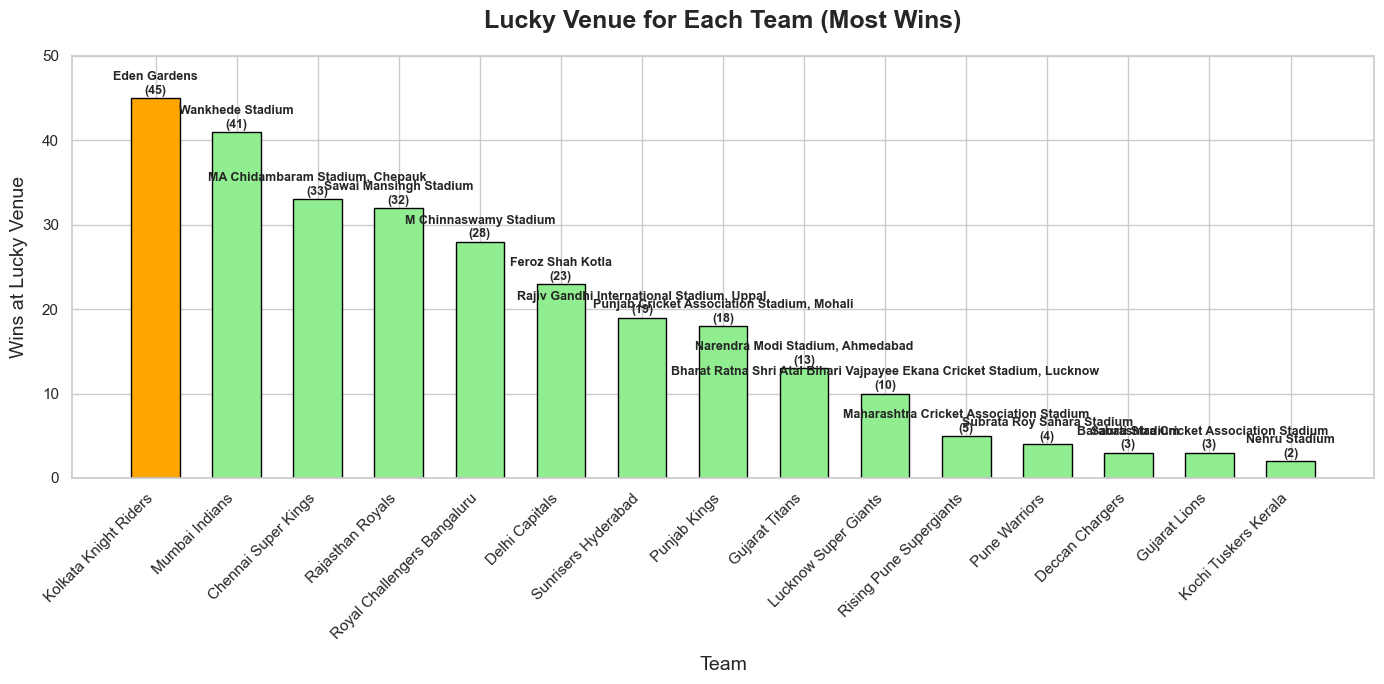

In [ ]:
import matplotlib.pyplot as plt

# Find the team with the maximum wins at their lucky venue
max_wins = lucky_venues['wins'].max()

# Assign colors: highlight the max wins in orange, others in light green
colors = ["orange" if val == max_wins else "lightgreen" for val in lucky_venues['wins']]

# Bar chart
plt.figure(figsize=(14, 7))
bars = plt.bar(lucky_venues['team_name'], lucky_venues['wins'], color=colors, edgecolor='black', width=0.6)

# Chart details
plt.title('Lucky Venue for Each Team (Most Wins)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Team', fontsize=14, labelpad=10)
plt.ylabel('Wins at Lucky Venue', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right')

# Add venue names and wins above bars
for index, (wins, venue) in enumerate(zip(lucky_venues['wins'], lucky_venues['venue'])):
    plt.text(index, wins + 0.5, f"{venue}\n({wins})", ha='center', fontsize=9, fontweight='bold')

# Add extra space on top for labels
plt.ylim(0, lucky_venues['wins'].max() + 5)

plt.tight_layout()
plt.show()

**Which stadium has hosted the most number of matches?**

In [ ]:
# Count number of matches per venue
venue_match_counts = (
    matches_df['venue']
    .value_counts()
    .reset_index()
)

venue_match_counts.columns = ['venue', 'match_count']

# Display top venues
display(venue_match_counts.head())

,venue,match_count
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Wankhede Stadium, Mumbai",52


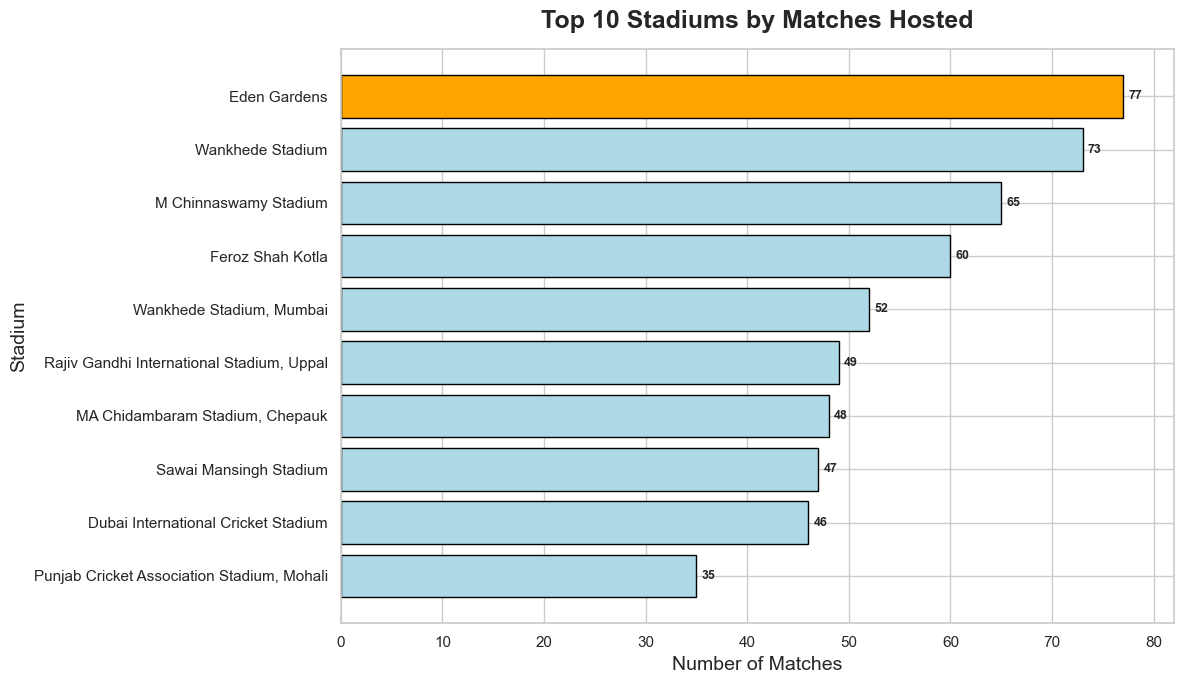

In [ ]:
import matplotlib.pyplot as plt

# Get top 10 venues
top_10_venues = venue_match_counts.head(10).sort_values(by='match_count', ascending=True)

# Find max matches for highlighting
max_matches = top_10_venues['match_count'].max()

# Assign colors
colors = ["orange" if val == max_matches else "lightblue" for val in top_10_venues['match_count']]

# Horizontal bar chart
plt.figure(figsize=(12, 7))
plt.barh(top_10_venues['venue'], top_10_venues['match_count'], color=colors, edgecolor='black')

# Chart details
plt.title('Top 10 Stadiums by Matches Hosted', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Number of Matches', fontsize=14)
plt.ylabel('Stadium', fontsize=14)

# Add value labels
for index, value in enumerate(top_10_venues['match_count']):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=9, fontweight='bold')

plt.xlim(0, max_matches + 5)
plt.tight_layout()
plt.show()

# Boundary analysis (4s, 6s, % contribution of boundaries)

**What is the count of runs scored from boundaries in each season?**

In [ ]:

ball_by_ball_df = pd.read_csv("E:/Project/IPL/ball_by_ball_data.csv")
# Filter only 4s and 6s
boundaries_df = ball_by_ball_df[ball_by_ball_df['batter_runs'].isin([4, 6])]

# Count of 4s per season
fours_per_season = boundaries_df[boundaries_df['batter_runs'] == 4].groupby('season_id').size().reset_index(name='fours')

# Count of 6s per season
sixes_per_season = boundaries_df[boundaries_df['batter_runs'] == 6].groupby('season_id').size().reset_index(name='sixes')

# Merge both
boundary_counts = pd.merge(fours_per_season, sixes_per_season, on='season_id', how='outer').fillna(0)

# Ensure numeric type
boundary_counts['fours'] = boundary_counts['fours'].astype(int)
boundary_counts['sixes'] = boundary_counts['sixes'].astype(int)

# Sort by season
boundary_counts = boundary_counts.sort_values(by='season_id')

# Display result
display(boundary_counts)

,season_id,fours,sixes
0,2008,1703,623
1,2009,1321,508
2,2010,1709,587
3,2011,1916,639
4,2012,1911,733
5,2013,2054,681
6,2014,1563,715
7,2015,1611,692
8,2016,1633,639
9,2017,1612,706


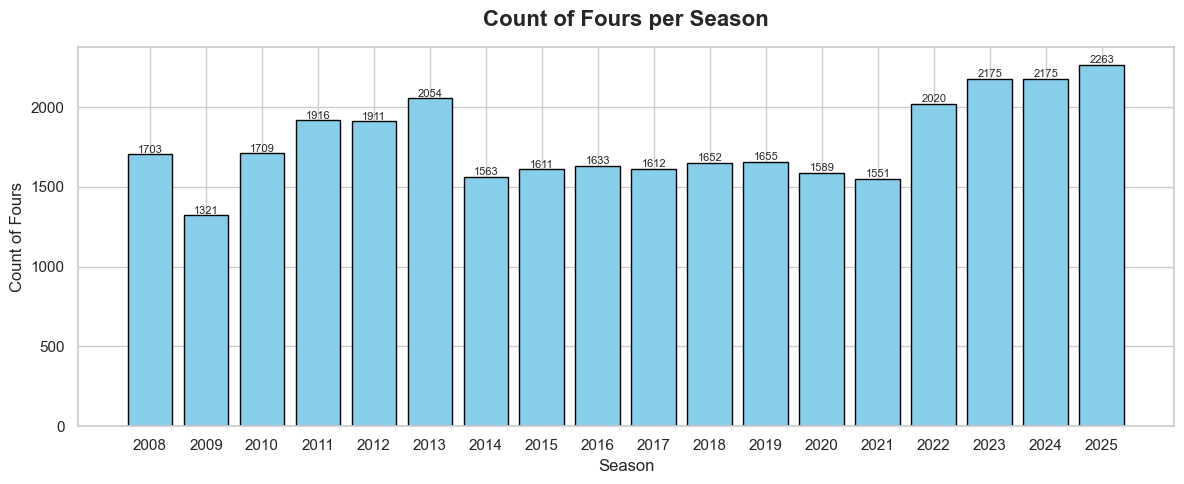

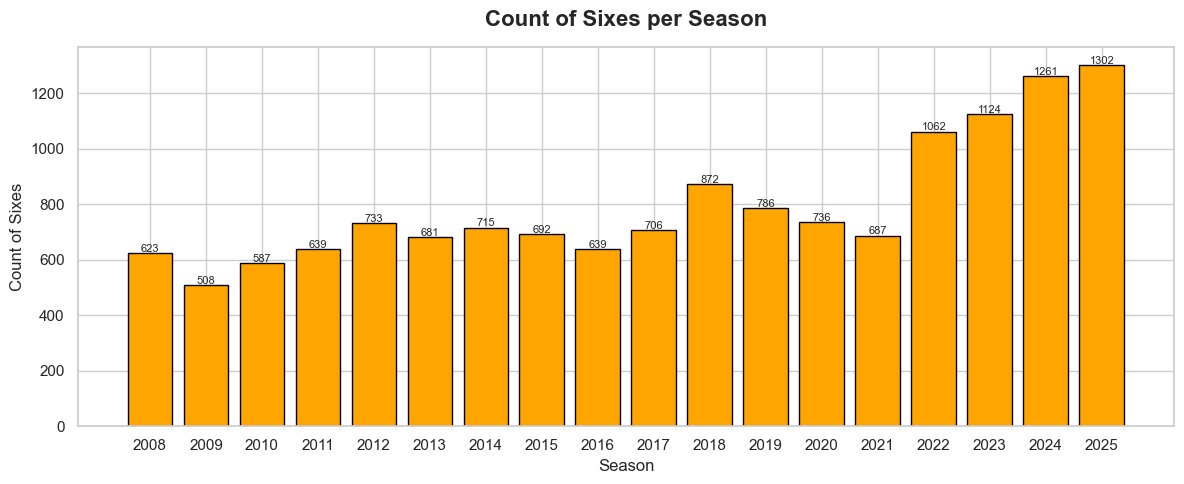

In [27]:
import matplotlib.pyplot as plt

# First bar chart - Fours
plt.figure(figsize=(12, 5))
plt.bar(boundary_counts['season_id'], boundary_counts['fours'], color='skyblue', edgecolor='black')
plt.title('Count of Fours per Season', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count of Fours', fontsize=12)
plt.xticks(boundary_counts['season_id'])

# Value labels
for i, v in enumerate(boundary_counts['fours']):
    plt.text(boundary_counts['season_id'].iloc[i], v + 10, str(v), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Second bar chart - Sixes
plt.figure(figsize=(12, 5))
plt.bar(boundary_counts['season_id'], boundary_counts['sixes'], color='orange', edgecolor='black')
plt.title('Count of Sixes per Season', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Count of Sixes', fontsize=12)
plt.xticks(boundary_counts['season_id'])

# Value labels
for i, v in enumerate(boundary_counts['sixes']):
    plt.text(boundary_counts['season_id'].iloc[i], v + 5, str(v), ha='center', fontsize=8)

plt.tight_layout()
plt.show()


**What is the run contribution from boundaries in each season?**

In [ ]:
# Total runs per season
season_total_runs = ball_by_ball_df.groupby('season_id')['total_runs'].sum().reset_index(name='total_runs')

# Filter boundary balls (4s and 6s only)
boundary_df = ball_by_ball_df[ball_by_ball_df['batter_runs'].isin([4, 6])]

# Sum batter runs from boundaries by season
boundary_runs = boundary_df.groupby('season_id')['batter_runs'].sum().reset_index(name='boundary_runs')

# Merge both DataFrames
season_summary = pd.merge(season_total_runs, boundary_runs, on='season_id')

# Calculate boundary contribution percentage
season_summary['boundary_contribution_pct'] = (season_summary['boundary_runs'] / season_summary['total_runs']) * 100

# Round and sort
season_summary = season_summary.sort_values(by='season_id')
season_summary['boundary_contribution_pct'] = season_summary['boundary_contribution_pct'].round(2)

# Display results
display(season_summary[['season_id', 'total_runs', 'boundary_runs', 'boundary_contribution_pct']])

,season_id,total_runs,boundary_runs,boundary_contribution_pct
0,2008,19851,10550,53.15
1,2009,19686,8332,42.32
2,2010,21754,10358,47.61
3,2011,23618,11498,48.68
4,2012,25181,12042,47.82
5,2013,22602,12302,54.43
6,2014,18931,10542,55.69
7,2015,18353,10596,57.73
8,2016,18862,10366,54.96
9,2017,18786,10684,56.87


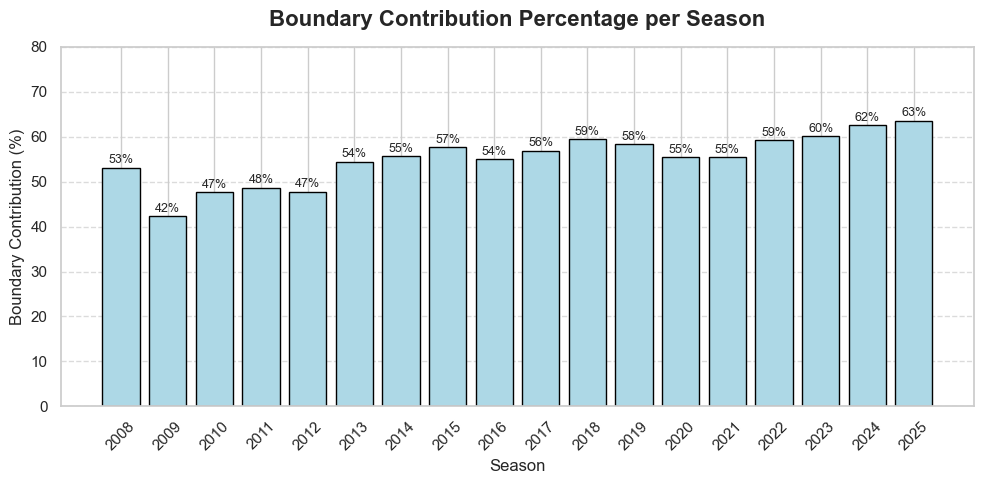

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Bar plot for boundary contribution percentage
plt.bar(season_summary['season_id'], season_summary['boundary_contribution_pct'], 
        color='lightblue', edgecolor='black')

# Chart details
plt.title('Boundary Contribution Percentage per Season', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Boundary Contribution (%)', fontsize=12)
plt.ylim(0, 80)  # percentage range
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Fix x-axis to show only whole seasons
plt.xticks(season_summary['season_id'], rotation=45)

# Value labels
for i, pct in enumerate(season_summary['boundary_contribution_pct']):
    plt.text(season_summary['season_id'].iloc[i], pct + 1, f'{int(pct)}%', 
             ha='center', fontsize=9)

plt.tight_layout()
plt.show()



# 🔥 Powerplay & Death Overs Analysis

Teams with highest powerplay run rate

Teams conceding most runs in powerplay

Teams conceding highest run-rate in death overs

**Which team has the best scoring run-rate in the first 6 overs?**

In [ ]:
import pandas as pd

# Load all the datasets
ball_by_ball_df = pd.read_csv("E:/Project/IPL/ball_by_ball_data.csv")
matches_df = pd.read_csv("E:/Project/IPL/ipl_matches_data.csv")
players_df = pd.read_csv("E:/Project/IPL/players-data.csv")
teams_df = pd.read_csv("E:/Project/IPL/teams_data.csv")
# Filter for first 6 overs (Powerplay)
powerplay_df = ball_by_ball_df[ball_by_ball_df['over_number'] < 6]

# Total runs scored by each team in powerplay
team_runs = powerplay_df.groupby('team_batting')['total_runs'].sum()

# Total overs played per team (unique overs per match + innings)
overs_per_team = (
    powerplay_df.groupby(['match_id', 'innings', 'team_batting'])['over_number']
    .nunique()
    .reset_index()
    .groupby('team_batting')['over_number']
    .sum()
)

# Calculate run rate
run_rate = (team_runs / overs_per_team).reset_index(name='run_rate')

# Merge with team names
teams_df = teams_df.rename(columns={'team_id': 'team_batting', 'team_short_code': 'team_name'})
run_rate_named = pd.merge(run_rate, teams_df[['team_batting', 'team_name']], on='team_batting', how='left')

# Sort by run rate descending
run_rate_named = run_rate_named.sort_values(by='run_rate', ascending=False)

# Select relevant columns
run_rate_named = run_rate_named[['team_name', 'run_rate']]

# Print top 10 teams
display(run_rate_named)


,team_name,run_rate
12,Deccan Chargers,10.242667
4,Gujarat Lions,8.613260
10,Lucknow Super Giants,8.461538
11,Gujarat Titans,8.372222
1,Sunrisers Hyderabad,8.267690
9,Punjab Kings,8.215959
8,Delhi Capitals,8.125236
5,Kolkata Knight Riders,8.095359
2,Mumbai Indians,8.016295
0,Royal Challengers Bangaluru,7.965775


**Which team has conceded most run-rate in the first 6 overs?**

In [ ]:
# Load all the datasets
ball_by_ball_df = pd.read_csv("E:/Project/IPL/ball_by_ball_data.csv")
matches_df = pd.read_csv("E:/Project/IPL/ipl_matches_data.csv")
players_df = pd.read_csv("E:/Project/IPL/players-data.csv")
teams_df = pd.read_csv("E:/Project/IPL/teams_data.csv")
# Filter for powerplay overs (0 to 5 inclusive)
powerplay_df = ball_by_ball_df[ball_by_ball_df['over_number'] < 6]

# Total runs conceded by each bowling team
conceded_runs = powerplay_df.groupby('team_bowling')['total_runs'].sum()

# Total overs bowled by each team in powerplay
overs_bowled = (
    powerplay_df.groupby(['match_id', 'innings', 'team_bowling'])['over_number']
    .nunique()
    .reset_index()
    .groupby('team_bowling')['over_number']
    .sum()
)

# Calculate run-rate conceded
run_rate_conceded = (conceded_runs / overs_bowled).reset_index(name='run_rate_conceded')

# Map team IDs to names
teams_df = teams_df.rename(columns={'team_id': 'team_bowling', 'team_short_code': 'team_name'})
result_df = pd.merge(run_rate_conceded, teams_df[['team_bowling', 'team_name']], on='team_bowling', how='left')

# Sort by worst (highest) run-rate conceded
result_df = result_df.sort_values(by='run_rate_conceded', ascending=False)

# Select and display relevant columns
result_df = result_df[['team_name', 'run_rate_conceded']]
display(result_df)

,team_name,run_rate_conceded
12,Deccan Chargers,10.360000
11,Gujarat Titans,8.852778
10,Lucknow Super Giants,8.710356
4,Gujarat Lions,8.292818
9,Punjab Kings,8.243778
8,Delhi Capitals,8.125396
0,Royal Challengers Bangaluru,8.112843
5,Kolkata Knight Riders,8.062065
6,Chennai Super Kings,8.026613
3,Rising Pune Supergiants,8.011173


**Which team has the conceded at highest run-rate in the last 4 overs?**

In [ ]:
# Filter for last 4 overs (16 to 19)
death_overs_df = ball_by_ball_df[ball_by_ball_df['over_number'].between(16, 19)]

# Total runs conceded by each bowling team
conceded_runs = death_overs_df.groupby('team_bowling')['total_runs'].sum()

# Total overs bowled by each team in death overs
overs_bowled = (
    death_overs_df.groupby(['match_id', 'innings', 'team_bowling'])['over_number']
    .nunique()
    .reset_index()
    .groupby('team_bowling')['over_number']
    .sum()
)

# Calculate run-rate conceded
run_rate_conceded = (conceded_runs / overs_bowled).reset_index(name='run_rate_conceded')

# Map team IDs to names
teams_df = teams_df.rename(columns={'team_id': 'team_bowling', 'team_short_code': 'team_name'})
result_df = pd.merge(run_rate_conceded, teams_df[['team_bowling', 'team_name']], on='team_bowling', how='left')

# Sort by worst (highest) economy rate conceded
result_df = result_df.sort_values(by='run_rate_conceded', ascending=False)

# Select and display relevant columns
result_df = result_df[['team_name', 'run_rate_conceded']]
display(result_df)

,team_name,run_rate_conceded
12,Deccan Chargers,17.131579
9,Punjab Kings,10.723596
4,Gujarat Lions,10.712871
13,Kochi Tuskers Kerala,10.604839
7,Rajasthan Royals,10.577160
10,Lucknow Super Giants,10.560209
0,Royal Challengers Bangaluru,10.487486
8,Delhi Capitals,10.249734
11,Gujarat Titans,10.153846
5,Kolkata Knight Riders,10.090192


# 💥 Batting and Bowling Analysis

Leading run scorers (all-time & season-wise)

Leading wicket-takers (all-time & season-wise)

Batsmen with most 4s & 6s

Batsmen with most balls faced

**Who are the leading run-scorers of all time?**

In [ ]:
# Group by batter name and sum their runs
leading_runs = ball_by_ball_df.groupby("batter")["batter_runs"].sum().reset_index()

# Find the top scorer
top_scorer = leading_runs.sort_values(by="batter_runs", ascending=False).head(5)

display(top_scorer)

,batter,batter_runs
658,V Kohli,8946
500,RG Sharma,7719
535,S Dhawan,7231
151,DA Warner,6721
569,SK Raina,5679


**Who are leading wicket-takers of all time?**

In [ ]:
# Filter only bowler-credit wickets (exclude run outs etc. if needed)
bowler_wickets = ball_by_ball_df[ball_by_ball_df["is_wicket"] == 1]

# Group by bowler and count wickets
wicket_counts = (
    bowler_wickets.groupby("bowler")["is_wicket"].sum().reset_index(name="wickets")
   
)

# Get top wicket taker
top_wicket_taker = wicket_counts.sort_values(by="wickets", ascending=False).head(5)

display(top_wicket_taker)

,bowler,wickets
464,YS Chahal,229
64,B Kumar,213
394,SP Narine,212
106,DJ Bravo,207
319,R Ashwin,205


**Who are top 5 player with the most number of 4's?**

In [ ]:
# Filter only boundaries (4 runs off the bat, no extras)
fours = ball_by_ball_df[(ball_by_ball_df["batter_runs"] == 4) & (ball_by_ball_df["extras"] == 0)]

# Count number of 4s per batter
fours_count = fours.groupby("batter")["batter_runs"].count().reset_index(name="fours")

# Find top batter with most 4s
top_fours = fours_count.sort_values(by="fours", ascending=False).head(5)

display(top_fours)


,batter,fours
526,V Kohli,773
432,S Dhawan,763
124,DA Warner,661
404,RG Sharma,636
45,AM Rahane,515


**Who are top 5 player with the most number of 6's?**

In [ ]:
# Filter only sixes (6 runs off the bat, no extras)
sixes = ball_by_ball_df[(ball_by_ball_df["batter_runs"] == 6) & (ball_by_ball_df["extras"] == 0)]

# Count number of 6s per batter
sixes_count = sixes.groupby("batter")["batter_runs"].count().reset_index(name="sixes")

# Find top batter with most 6s
top_sixes = sixes_count.sort_values(by="sixes", ascending=False).head(5)

display(top_sixes)

,batter,sixes
88,CH Gayle,354
336,RG Sharma,300
443,V Kohli,291
263,MS Dhoni,261
15,AB de Villiers,250


**Who are top 5 player with the most number of balls played ?**

In [ ]:
# Consider only valid balls faced (exclude wides)
valid_balls = ball_by_ball_df[ball_by_ball_df["is_wide_ball"] == 0]

# Count balls faced by each batter
balls_faced = valid_balls.groupby("batter")["ball_number"].count().reset_index(name="balls_faced")

# Find the batsman who faced the most balls
top_balls_faced = balls_faced.sort_values(by="balls_faced", ascending=False).head(5)

display(top_balls_faced)

,batter,balls_faced
658,V Kohli,6523
500,RG Sharma,5337
535,S Dhawan,5326
151,DA Warner,4702
569,SK Raina,4046


# 👑 Player-Specific Analysis

**Virat Kohli (runs, SR, average, boundaries contribution)**

Virat Kohli Analysis:
Total Runs: 8946
Balls Faced: 6523
Fours: 773
Sixes: 291
Strike Rate: 137.15
Dismissals: 219
Batting Average: 40.85


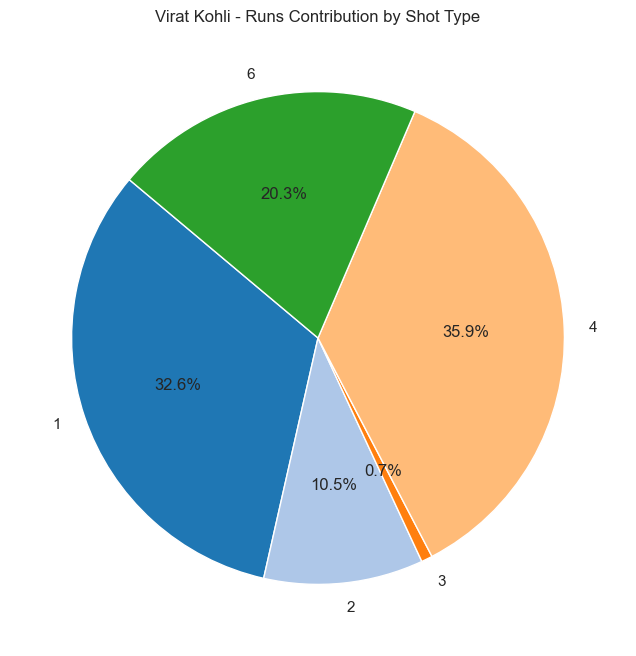

In [ ]:
# Particular Player analysis
# Filter Virat Kohli's batting records
kohli_data = ball_by_ball_df[ball_by_ball_df["batter"] == "V Kohli"]

# -------------------------
# 🏏 Stats Calculation
# -------------------------
# 1. Total runs
total_runs = kohli_data["batter_runs"].sum()

# 2. Balls faced (exclude wides)
balls_faced = kohli_data[kohli_data["is_wide_ball"] == 0].shape[0]

# 3. Number of 4s and 6s
fours = kohli_data[(kohli_data["batter_runs"] == 4) & (kohli_data["extras"] == 0)].shape[0]
sixes = kohli_data[(kohli_data["batter_runs"] == 6) & (kohli_data["extras"] == 0)].shape[0]

# 4. Strike rate
strike_rate = (total_runs / balls_faced) * 100 if balls_faced > 0 else 0

# 5. Dismissals
dismissals = (ball_by_ball_df["player_out"] == "V Kohli").sum()

# 6. Batting average
average = total_runs / dismissals if dismissals > 0 else total_runs

# Print analysis
print("Virat Kohli Analysis:")
print(f"Total Runs: {total_runs}")
print(f"Balls Faced: {balls_faced}")
print(f"Fours: {fours}")
print(f"Sixes: {sixes}")
print(f"Strike Rate: {strike_rate:.2f}")
print(f"Dismissals: {dismissals}")
print(f"Batting Average: {average:.2f}")

# -------------------------
# 📊 Runs Distribution Visual
# -------------------------
# Count runs by shot type (only valid scoring shots: 1,2,3,4,6)
scoring_shots = kohli_data[kohli_data["batter_runs"].isin([1,2,3,4,6])]

# Count frequency of each run type
runs_distribution = scoring_shots["batter_runs"].value_counts().sort_index()

# Calculate total contribution (runs)
runs_contribution = runs_distribution * runs_distribution.index

# Plot
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    runs_contribution.values, 
    labels=runs_contribution.index.astype(str), 
    autopct='%1.1f%%',  # Show percentage
    startangle=140,      # Rotate start angle for better view
    colors=plt.cm.tab20.colors  # Optional: use a color palette
)

# Title
plt.title("Virat Kohli - Runs Contribution by Shot Type")

plt.show()



# 📌 Insights & Conclusion
**🔹 Tournament Evolution**

The IPL has grown from 59 matches in 2008 to 74 matches in 2025, highlighting the league’s expansion and increased competitiveness.

Average runs per season have steadily increased, reflecting aggressive batting approaches and the introduction of rules like Impact Player and Strategic Timeouts.

Boundary contribution (4s & 6s) has risen above 60% of total runs post-2020, indicating a shift toward power-hitting.

**🔹 Toss & Match Outcome**

Toss continues to have moderate influence (~52% win rate), but match results depend more on team strength and conditions.

Chasing has become a stronger strategy, with 55% win rate overall, especially after 2016 when batting second gained an edge due to dew and pitch behavior.

**🔹 Team Performance**

Mumbai Indians (MI) and Chennai Super Kings (CSK) remain the most successful franchises, each with 50%+ win rates and dominance in playoffs.

Newer teams like Gujarat Titans and Lucknow Super Giants have made an immediate impact with high win percentages in their early seasons.

Certain venues act as “lucky grounds”: CSK at Chepauk (70%+ win rate), MI at Wankhede, and KKR at Eden Gardens.

**🔹 Player Contributions**

Virat Kohli leads as the all-time run scorer (8900+ runs), followed by Rohit Sharma and Shikhar Dhawan.

Yuzvendra Chahal, Bhuvneshwer kumar, Sunil Narine and Ravichandran Ashwin dominate the wicket-takers’ list.

Evolution in player roles: Power-hitters (e.g., Andre Russell, Suryakumar Yadav) and finishers have become increasingly vital.

**🔹 Powerplay & Death Overs**

Teams like Gujarat Lions (historically) and Lucknow Super Giants excelled in powerplays with aggressive starts.

Death overs remain decisive: conceding 10+ runs per over often swings results against the bowling team.

# 🏁 Final Conclusion

The IPL has evolved into a data-driven, strategy-intensive league where:

Batting depth, aggressive powerplay starts, and strong death-over bowling define champions.

Chasing has overtaken defending in terms of win probability.

Consistent teams (MI, CSK) and emerging franchises (GT, LSG) showcase the balance between legacy dominance and new-age competitiveness.

Players like Kohli, Rohit, Dhawan, Rashid, and Malinga have set benchmarks, while younger talents continue to redefine the tournament.

The analysis highlights how the IPL is not just entertainment but also a statistical goldmine, reflecting evolving cricketing trends and providing insights for players, teams, analysts, and fans alike.